In [9]:
from custom_benchmark_problems.diamon_problem.core.evaluation import BMP
from custom_benchmark_problems.diamon_problem.data_structures.tree import Tree
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib widget


dimension = 1
tree = Tree(dim_space=dimension)
tree.from_json("simplest_tree.json")
bmp = BMP(sequence_info=tree.to_sequence(), dim_space=dimension, rotate=False)

In [10]:
def f_1(t_1,t_2,x_1):
    y = bmp.evaluate(np.array([t_1,x_1],dtype="float64")).y
    norm = abs(t_1) + abs(t_2)
    # norm = abs(t_1)
    return y + norm

In [11]:
def f_2(t_1):
    return abs(t_1)

In [12]:
def f_3(t_2):
    return abs(t_2)

In [13]:
t_s = []
f_hats = []
f_1_s = []
f_2_s = []
f_3_s = []

for t1 in [x/100 for x in range(201)]:
    for t2 in [x/100 for x in range(201)]:
        t_s.append((t1,t2,))
        f_hats.append(bmp.evaluate(np.array([t1,0],dtype="float64")).y)
        f_1_s.append(f_1(t_1=t1, t_2=t2, x_1=0))
        f_2_s.append(f_2(t_1=t1))
        f_3_s.append(f_3(t_2=t2))

f_matrix = np.array([f_1_s, f_2_s,f_3_s]).T
f_hat_matrix = np.array([f_hats, f_2_s,f_3_s]).T
f_1_s = f_matrix[:,0]
f_2_s = f_matrix[:,1]
f_3_s = f_matrix[:,2]


(-4.1, 4.1)

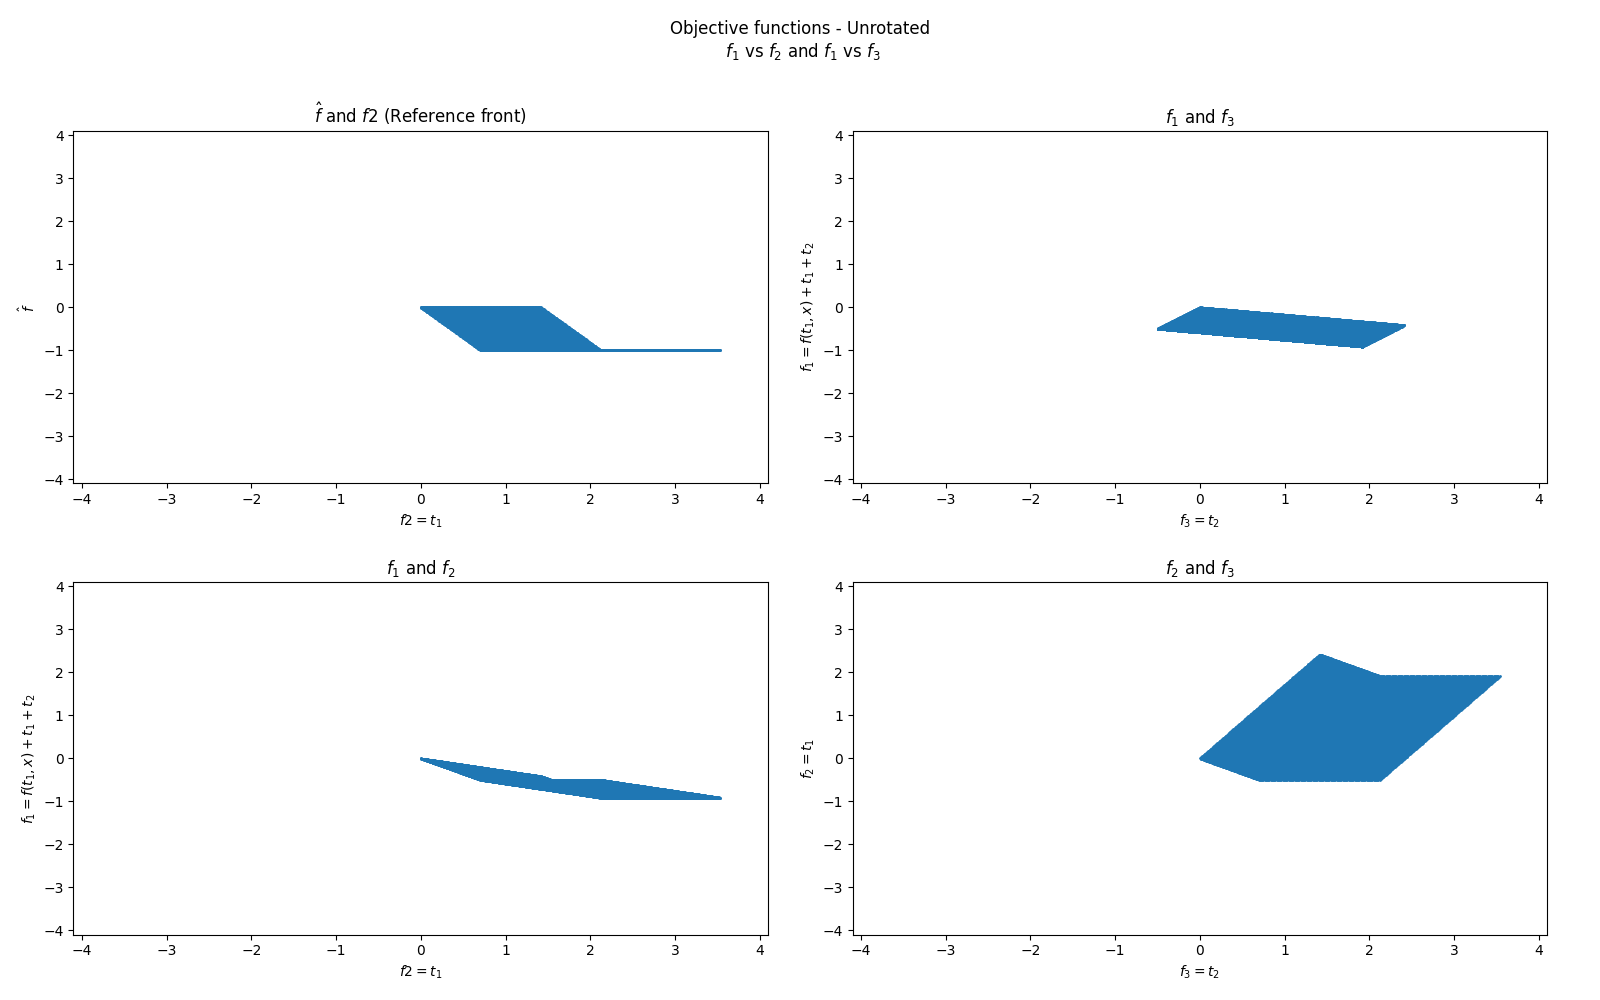

In [17]:
# for degree in range(181):

theta = np.radians(-45)
c, s = np.cos(theta), np.sin(theta)
rotation_matrix = np.array(((c, -s,0), (s, c,0),(0,0,1)))

theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
rotation_matrix_2 = np.array(((c, 0,s), (0, 1,0),(-s,0,c)))

f_matrix = np.matmul(f_matrix, rotation_matrix)
f_matrix = np.matmul(f_matrix, rotation_matrix_2)

f_hats = f_hat_matrix[:,0]
f_1_s = f_matrix[:,0]
f_2_s = f_matrix[:,1]
f_3_s = f_matrix[:,2]

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Objective functions - Unrotated\n ${f_1}$ vs ${f_2}$ and ${f_1}$ vs ${f_3}$")
fig.tight_layout(pad=3,h_pad=5)

indices = 101

axs[0,0].set_title("${\hat{f}}$ and ${f2}$ (Reference front)")
axs[0,0].set_xlabel("${f2=t_1}$")
axs[0,0].set_ylabel("${\hat{f}}$")
axs[0,0].scatter(f_2_s,f_hats, s=1)
axs[0,0].set_ylim([-4.1, 4.1])
axs[0,0].set_xlim([-4.1, 4.1])
# axs[0,0].legend()

axs[0,1].set_title("${f_1}$ and ${f_3}$")
axs[0,1].set_xlabel("${f_3=t_2}$")
axs[0,1].set_ylabel("${f_1=f(t_1,x)+t_1+t_2}$")
axs[0,1].scatter(f_3_s,f_1_s, s=1)
# axs[0,1].plot(t_s,f_3_l1_t_s, label="${f_3(t,0)}$")
axs[0,1].set_ylim([-4.1, 4.1])
axs[0,1].set_xlim([-4.1, 4.1])
# axs[0,1].legend()


axs[1,0].set_title("${f_1}$ and ${f_2}$")
axs[1,0].set_xlabel("${f2=t_1}$")
axs[1,0].set_ylabel("${f_1=f(t_1,x)+t_1+t_2}$")
axs[1,0].scatter(f_2_s,f_1_s, s=1)
axs[1,0].set_ylim([-4.1, 4.1])
axs[1,0].set_xlim([-4.1, 4.1])
# axs[1,0].legend()

axs[1,1].set_title("${f_2}$ and ${f_3}$")
axs[1,1].set_xlabel("${f_3=t_2}$")
axs[1,1].set_ylabel("${f_2=t_1}$")
axs[1,1].scatter(f_2_s,f_3_s, s=1)
# axs[1,1].plot(x_s,f_3_l1_x_s, label="${f_3(t,0)}$")
axs[1,1].set_ylim([-4.1, 4.1])
axs[1,1].set_xlim([-4.1, 4.1])
# axs[1,1].legend()
# plt.savefig(f'figure_{degree:04}.png')
# plt.clf()
# plt.close()

In [18]:
# rotation_matrix = 

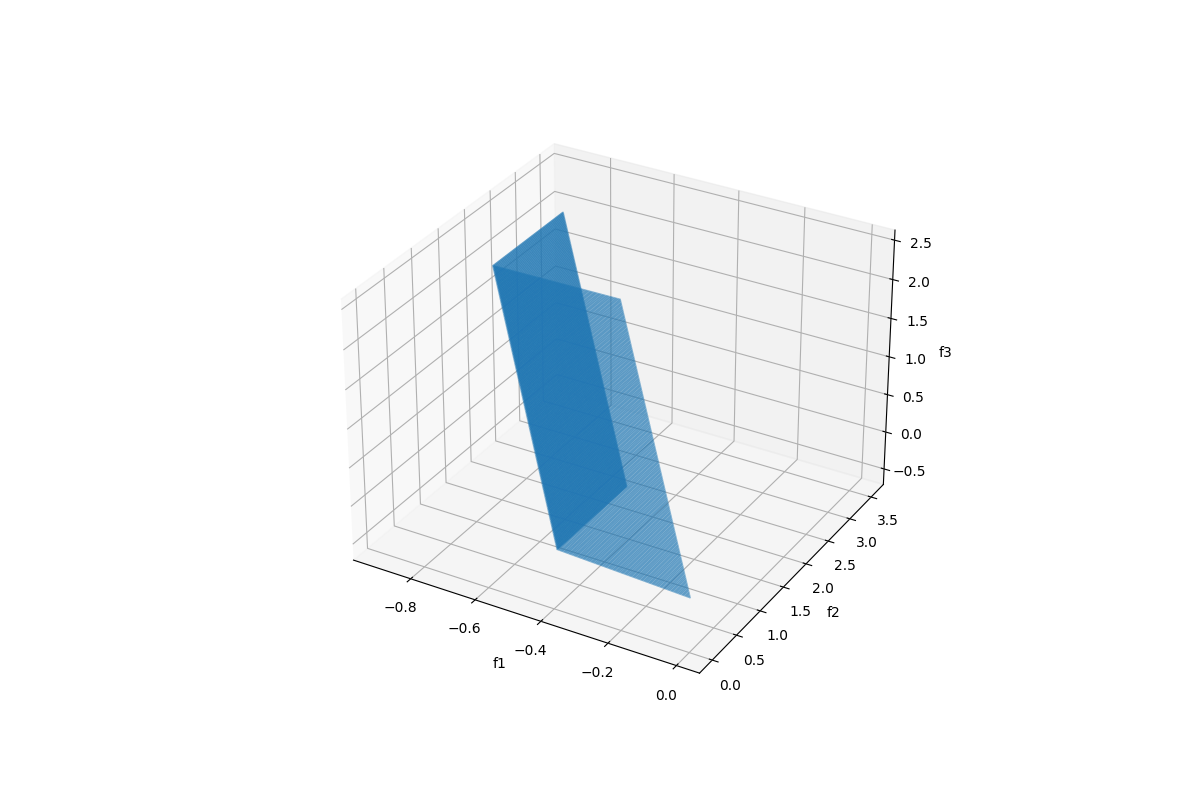

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(f_1_s, f_2_s, f_3_s,marker='.',s=1,alpha=0.5)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.show()